In [1]:
# import os
# import matplotlib.pyplot as plt
# from PIL import Image

# # Directories containing images for each column
# dirs = {
#     # "Reference": "images/compare",
#     "DreamGaussian": "results/compare/dreamgaussian",
#     "Ours": "results/compare/ours",

    
# }

# # Number of images in each column
# num_images = len(os.listdir(next(iter(dirs.values()))))

# # Create a figure
# fig, axes = plt.subplots(nrows=num_images, ncols=len(dirs), figsize=(15, 10))

# # Iterate over directories and plot images
# for col_idx, (label, dir_path) in enumerate(dirs.items()):
#     image_files = sorted(os.listdir(dir_path))  # Ensure consistent order
#     for row_idx, image_file in enumerate(image_files):
#         image_path = os.path.join(dir_path, image_file)
#         image = Image.open(image_path)
#         axes[row_idx, col_idx].imshow(image)
#         axes[row_idx, col_idx].axis('off')
    
#     # Set the column title as text below the images
#     fig.text((col_idx + 0.5) / len(dirs), -0.01, label, ha='center', fontsize=14, weight='bold', va='top')

# # # Add the caption at the bottom
# # fig.text(0.5, -0.05, "Figure: Comparisons on Image-to-3D. Our method achieves a better balance between generation speed and mesh quality on various images.", 
# #          ha='center', fontsize=12, weight='bold')

# # Adjust layout
# plt.tight_layout(pad=2)
# # plt.subplots_adjust(bottom=0.15)  # Adjust space for the labels and the caption

# # Save and show the plot
# plt.savefig('comparison_image.png', dpi=300, bbox_inches='tight')
# plt.show()

In [2]:
import os
from collections import defaultdict

# Directories containing images for each column
source_dirs = {
    "DreamGaussian": "results/compare/dreamgaussian",
    "Ours": "results/compare/ours",
}

# Function to group images by angles
def group_images_by_angle(source_dirs):
    grouped_images = {
        "0h": defaultdict(list),
        "45h": defaultdict(list),
        "180h": defaultdict(list),
    }

    for dir_name, dir_path in source_dirs.items():
        for image_file in sorted(os.listdir(dir_path)):
            angle = None
            if "_h0_" in image_file:
                angle = "0h"
            elif "_h45_" in image_file:
                angle = "45h"
            elif "_h180_" in image_file:
                angle = "180h"

            if angle:
                grouped_images[angle][dir_name].append(os.path.join(dir_path, image_file))

    return grouped_images

# Group the images
grouped_images = group_images_by_angle(source_dirs)

# Print the grouped images for verification
for angle, images in grouped_images.items():
    print(f"\nAngle: {angle}")
    for method, image_list in images.items():
        print(f"  {method}:")
        for image in image_list:
            print(f"    {image}")


Angle: 0h
  DreamGaussian:
    results/compare/dreamgaussian/image-11 copy_rgba_capture_and_save_v0_h0_r2_s500_i0_uuid_3a440caf265640f68077e9eebc6e33be.jpg
    results/compare/dreamgaussian/image-15 copy_rgba_capture_and_save_v0_h0_r2_s500_i0_uuid_d1021ca41ea1476d9d2ac3b1118b222d.jpg
    results/compare/dreamgaussian/image-3 copy_rgba_capture_and_save_v0_h0_r2_s500_i0_uuid_1939f977a75a43409b21e149bfc3e121.jpg
    results/compare/dreamgaussian/image-4 copy_rgba_capture_and_save_v0_h0_r2_s500_i0_uuid_5e64e7460ddf4b39be0950658ae46b50.jpg
    results/compare/dreamgaussian/image-6 copy_rgba_capture_and_save_v0_h0_r2_s500_i0_uuid_d712efcfcf264467aa5ed68306ce43fe.jpg
  Ours:
    results/compare/ours/image-11 copy_rgba_capture_and_save_v0_h0_r2_s500_i0_uuid_7fce37ddc5884c2e93291f54ce1c9900.jpg
    results/compare/ours/image-15 copy_rgba_capture_and_save_v0_h0_r2_s500_i0_uuid_d161a374356e4733a9ae0f2037105be8.jpg
    results/compare/ours/image-3 copy_rgba_capture_and_save_v0_h0_r2_s500_i0_uuid_

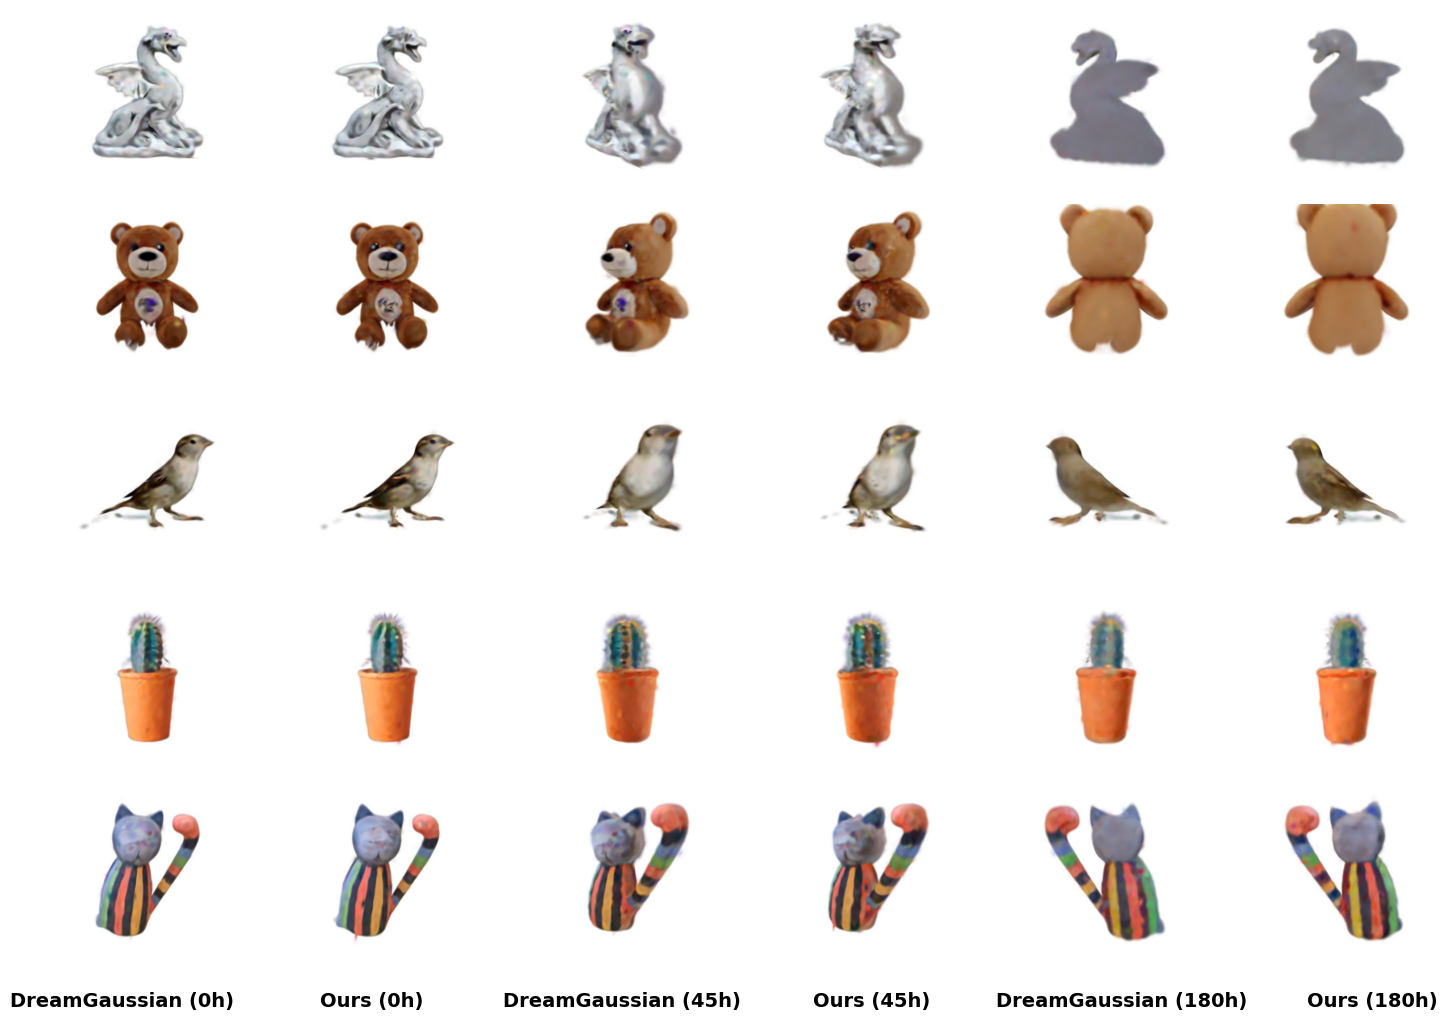

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

# Create a figure with subplots for each angle
fig, axes = plt.subplots(nrows=len(grouped_images["0h"]["DreamGaussian"]), ncols=3*len(source_dirs), figsize=(15, 10))

# Iterate over the angles and plot images
for angle_idx, (angle, methods) in enumerate(grouped_images.items()):
    for row_idx, method in enumerate(source_dirs.keys()):
        for image_idx, image_path in enumerate(methods[method]):
            image = Image.open(image_path)
            ax = axes[image_idx, angle_idx * len(source_dirs) + row_idx]
            ax.imshow(image)
            ax.axis('off')

# Set the column titles
for angle_idx, angle in enumerate(grouped_images.keys()):
    for col_idx, method in enumerate(source_dirs.keys()):
        fig.text((angle_idx * len(source_dirs) + col_idx + 0.5) / (len(grouped_images) * len(source_dirs)), -0.01, f"{method} ({angle})", ha='center', fontsize=14, weight='bold', va='top')

# Adjust layout
plt.tight_layout(pad=2)
# Save and show the plot
plt.savefig('comparison_image.png', dpi=300, bbox_inches='tight')
plt.show()